# Setup

In [1]:
import sys;
!{sys.executable} -m pip install seaborn;
!{sys.executable} -m pip install rsatoolbox;
!{sys.executable} -m pip install pyexcel_ods;
!{sys.executable} -m pip install mne;
import mne;
import matplotlib;
import matplotlib.pyplot as plt;
from matplotlib.offsetbox import OffsetImage, AnnotationBbox;
import pathlib;
import pandas as pd;
import numpy as np;
import seaborn as sns;
import configparser;
import scipy;
import scipy.io;
from scipy.io import loadmat;
import scipy.spatial
from scipy.spatial.distance import pdist, squareform;
import scipy.spatial.distance as sd
import json;
from PIL import Image;
import mne;
import pyexcel_ods;
from pyexcel_ods import get_data;
import rsatoolbox as rsa;
import rsatoolbox.data as rsa_data;
import rsatoolbox.rdm as rdm;
import rsatoolbox.vis as vis;
import rsatoolbox.io as io;
from rsatoolbox.io import meadows;
from rsatoolbox.vis import rdm_plot;
from rsatoolbox.rdm import rdms;

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached rsatoolbox-0.0.3-py3-none-any.whl (131 kB)
  Using cached coverage-5.5-cp39-cp39-win_amd64.whl (211 kB)
  Using cached pyexcel_ods-0.6.0-py2.py3-none-any.whl (10 kB)
  Using cached odfpy-1.4.1-py2.py3-none-any.whl
  Using cached pyexcel_io-0.6.4-py2.py3-none-any.whl (44 kB)
  Using cached lml-0.1.0-py2.py3-none-any.whl (10 kB)


In [4]:
#matplotlib.use('Qt5Agg') # use Qt5Agg backend = best choice for MNE-Python's interactive plotting functions

In [3]:
#help(rsa)

# Analysis of meadows data 

In [4]:
#filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\participants.tsv"
#df_particpants = pd.read_csv(filepath, sep="\t") 
#a = df_particpants.values
#df_particpants # has information regarding head circumference

,participant_id,head_circumference
0,pilot0,NaN
1,pilot1,NaN
2,pilot2,NaN
3,pilot3,59.0
4,01,NaN
5,02,NaN
6,03,NaN
7,04,NaN
8,05,NaN


In [5]:
#filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\sub-01_ses-05_scans.tsv"
#df = pd.read_csv(filepath, sep="\t") 
#a = df.values

In [6]:
#filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\sub-01_ses-06_scans.tsv"
#df = pd.read_csv(filepath, sep="\t") 
#a = df.values

In [7]:
#filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\sub-01_ses-07_scans.tsv"
#df = pd.read_csv(filepath, sep="\t") 
#a = df.values

In [8]:
#filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\sub-01_ses-08_scans.tsv"
#df = pd.read_csv(filepath, sep="\t") 
#a = df.values

In [9]:
# filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\sub-01_ses-09_scans.tsv"
# df = pd.read_csv(filepath, sep="\t") 
# a = df.values

In [10]:
# filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\sub-01_ses-10_scans.tsv"
# df = pd.read_csv(filepath, sep="\t") 
# a = df.values

In [11]:
#filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\nback.tsv"
#df_nback = pd.read_csv(filepath, sep="\t") 
#a = df_nback.values
#df_nback = df_nback.drop(['run', 'session', 'datetime'], axis=1) # drop coloumns 
#df_nback = df_nback.rename({'subject' : 'participant_id'}, axis = 1)
#df_nback = pd.merge(df_nback, df_particpants)  # merge with participant info
#df_nback

,participant_id,n_targets,hits,false_alarms,rt,keys,head_circumference
0,01,10,10,3,2.205460,num_add=13,NaN
1,01,10,9,2,2.060333,num_add=11,NaN
2,01,10,9,0,1.686978,num_add=9,NaN
3,01,10,6,2,1.767783,num_add=8,NaN
4,01,10,8,0,1.634375,"num_add=8, f6=1",NaN
...,...,...,...,...,...,...,...
262,pilot3,10,9,0,2.537833,num_add=9,59.0
263,pilot3,10,9,0,1.205478,num_add=9,59.0
264,pilot3,10,8,0,1.451775,num_add=8,59.0
265,pilot3,10,10,0,1.824880,num_add=10,59.0


In [12]:
#sub1df = df_nback.loc[df_nback['participant_id'] == '01'] #subject 1

In [13]:
#filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\Meadows_avima-audio-version1_v_v2_secure-kit_2_events.log.tsv"
#sub1 = pd.read_csv(filepath, sep="\t") 
#a = sub1.values
#sub1 = sub1.drop(['logStarted'], axis = 1)
#sub1

,1567513886687,{}
0,1567513886687,"{'w': 1920, 'h': 1080}"
1,1567513886688,"{'w': 1853, 'h': 885.328125}"
2,1567514029353,"{'w': 1920, 'h': 974.6875}"
3,1567514047302,"{'y': -0.3799515981009865, 'cat': '', 'x': 0.0..."
4,1567514050405,"{'y': -0.8383082333968689, 'cat': '', 'x': -0...."
...,...,...
1435,1567516607547,"{'y': -0.510325622694293, 'cat': '', 'x': -0.1..."
1436,1567516609114,"{'y': 0.18160455157696875, 'cat': '', 'x': 0.5..."
1437,1567516611033,"{'y': -0.004344210018284718, 'cat': '', 'x': 0..."
1438,1567516612569,"{'y': 0.413425042076587, 'cat': '', 'x': 0.123..."


In [ ]:
#sub2df = df_nback.loc[df_nback['participant_id'] == '02'] # subject 2 

In [ ]:
#sub3df = df_nback.loc[df_nback['participant_id'] == '03'] # subject 3

In [ ]:
#sub4df = df_nback.loc[df_nback['participant_id'] == '04'] # subject 4

In [ ]:
#sub5df = df_nback.loc[df_nback['participant_id'] == '05'] # subject 5

In [ ]:
#pil0df = df_nback.loc[df_nback['participant_id'] == 'pilot0'] # pilot study 0

In [ ]:
#pil1df = df_nback.loc[df_nback['participant_id'] == 'pilot1'] # pilot study 1

In [ ]:
#pil2df = df_nback.loc[df_nback['participant_id'] == 'pilot2'] # pilot study 2

In [ ]:
#pil3df = df_nback.loc[df_nback['participant_id'] == 'pilot3'] # pilot study 3

# Subject 1 

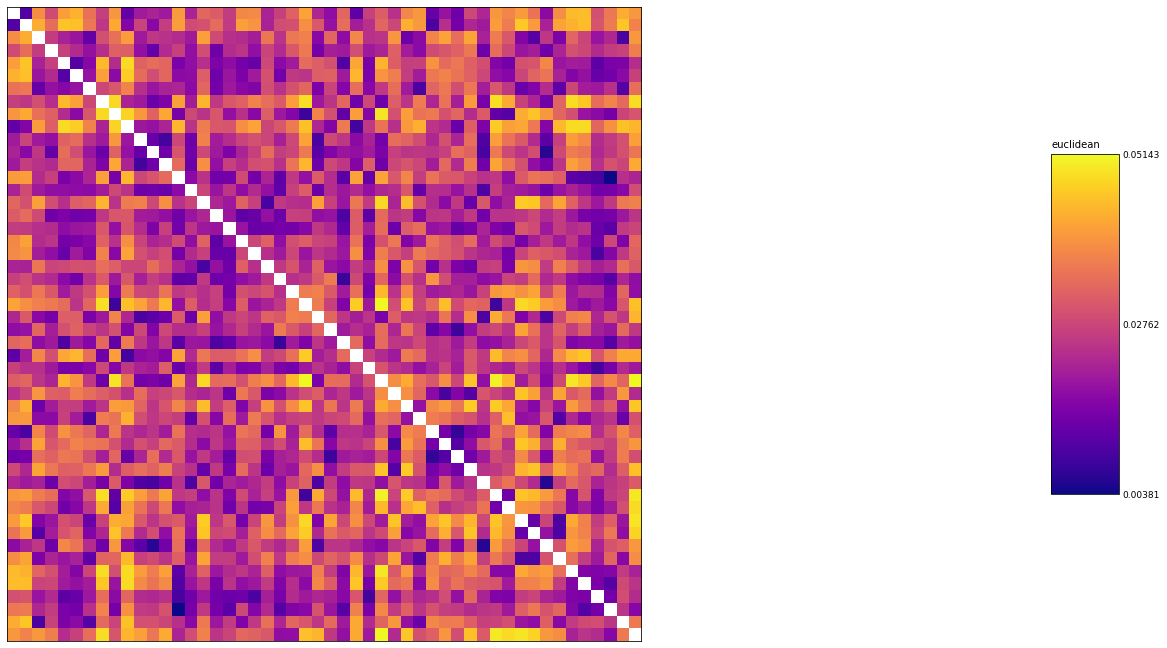

In [67]:
# subject 1 - audio 
sub1_audio = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-audio-version1_v_v2_secure-kit_2_1D.mat"
securekit = scipy.io.loadmat(sub1_audio)
#print(securekit) # we can see rdmutv
#rdmutv = securekit["rdmutv"] #rdmutv is the upper triangle so create matrix
#euc_dist = rdmutv.T + rdmutv - np.diag(np.diag(rdmutv))
#np.fill_diagonal(euc_dist,0, wrap=False)

rdm_sub1_audio = rsa.io.meadows.load_rdms(sub1_audio)
fig,axis,_ = rsa.vis.show_rdm(rdm_sub1_audio, cmap = 'plasma', figsize=(25,25), show_colorbar="figure")

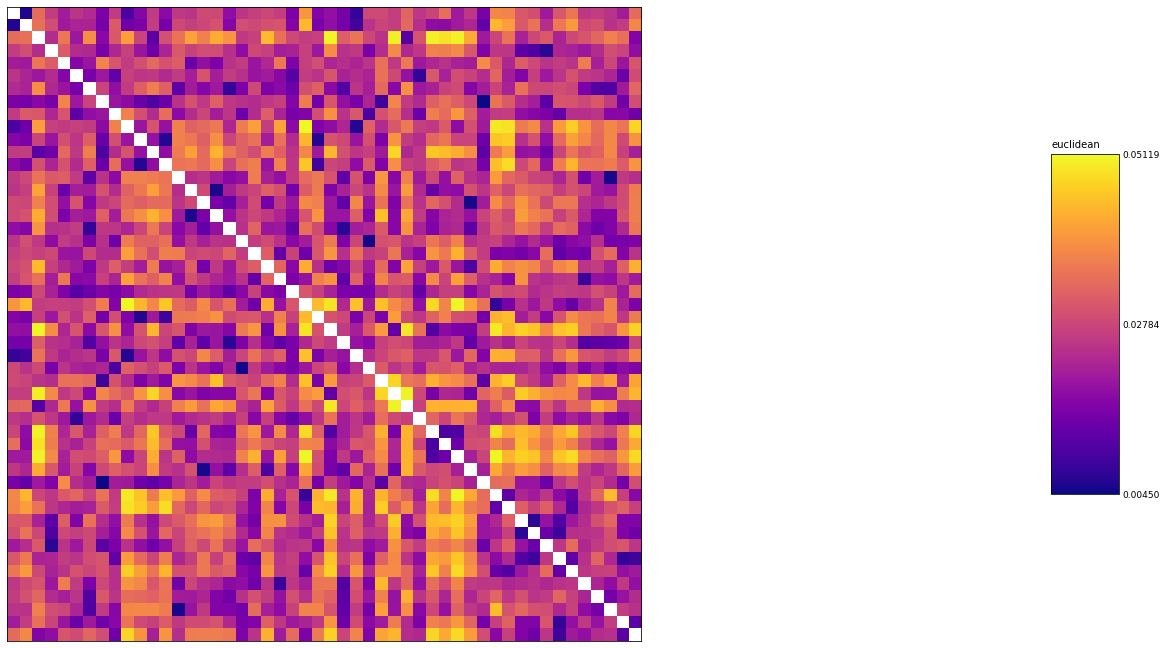

In [23]:
#subject 1 - image
sub1_img = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-image-version1_v_v2_vital-macaw_2_1D.mat"
rdm_sub1_img = rsa.io.meadows.load_rdms(sub1_img)
fig,axis,_ = rsa.vis.show_rdm(rdm_sub1_img, cmap = 'plasma', figsize=(25,25), show_colorbar="figure")

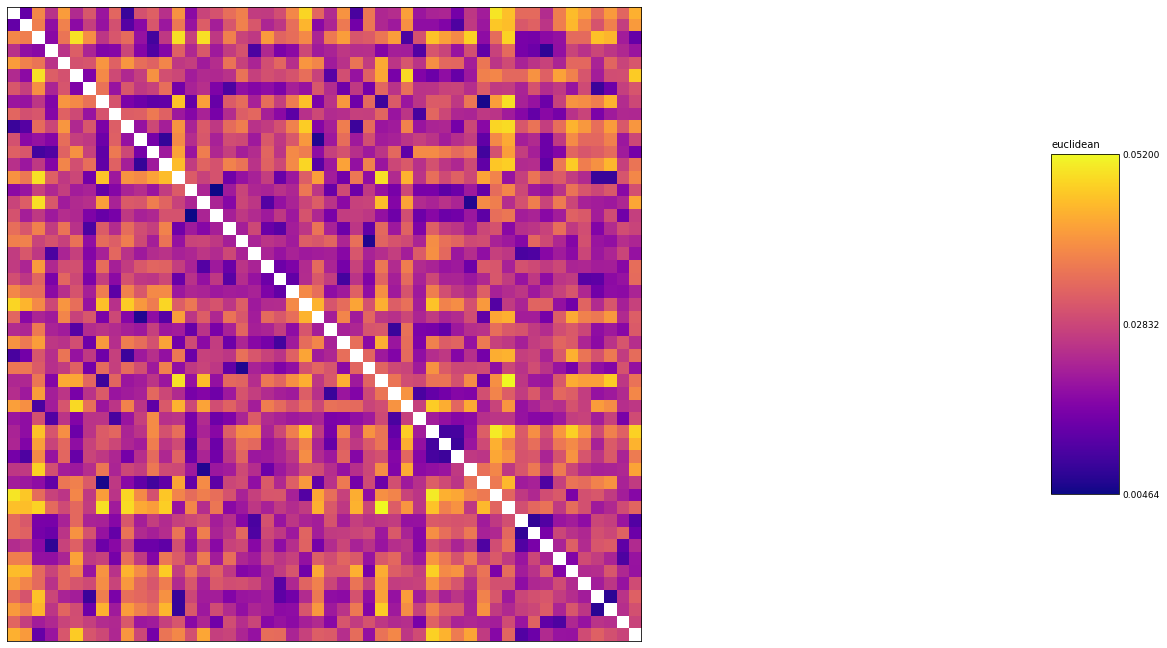

In [24]:
#subject 1 - mute video
sub1_mutevid = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-videomutesound-version1_v_v2_glad-owl_2_1D.mat"
rdm_sub1_mutevid = rsa.io.meadows.load_rdms(sub1_mutevid)
fig,axis,_ = rsa.vis.show_rdm(rdm_sub1_mutevid, cmap = 'plasma', figsize=(25,25), show_colorbar="figure")

In [ ]:
#pearson correlation 

# we want to compare audio to video 
sub1_vidxaudio = rdm.compare_correlation(rdm_sub1_vid, rdm_sub1_audio)
# compare img to video 
sub1_vidximg = rdm.compare_correlation(rdm_sub1_vid, rdm_sub1_img)
# compare img to mute video
sub1_imgxmute = rdm.compare_correlation(rdm_sub1_img, rdm_sub1_mutevid)
#compare video to mute video
sub1_vidxmute = rdm.compare_correlation(rdm_sub1_vid, rdm_sub1_mutevid)
# compare audio to image/mute video 
sub1_audioximg = rdm.compare_correlation(rdm_sub1_audio, rdm_sub1_img)
sub1_audioxmute = rdm.compare_correlation(rdm_sub1_audio, rdm_sub1_mutevid)
# compare video with mute video 
sub1_vidxmute = rdm.compare_correlation(rdm_sub1_vid, rdm_sub1_mutevid)

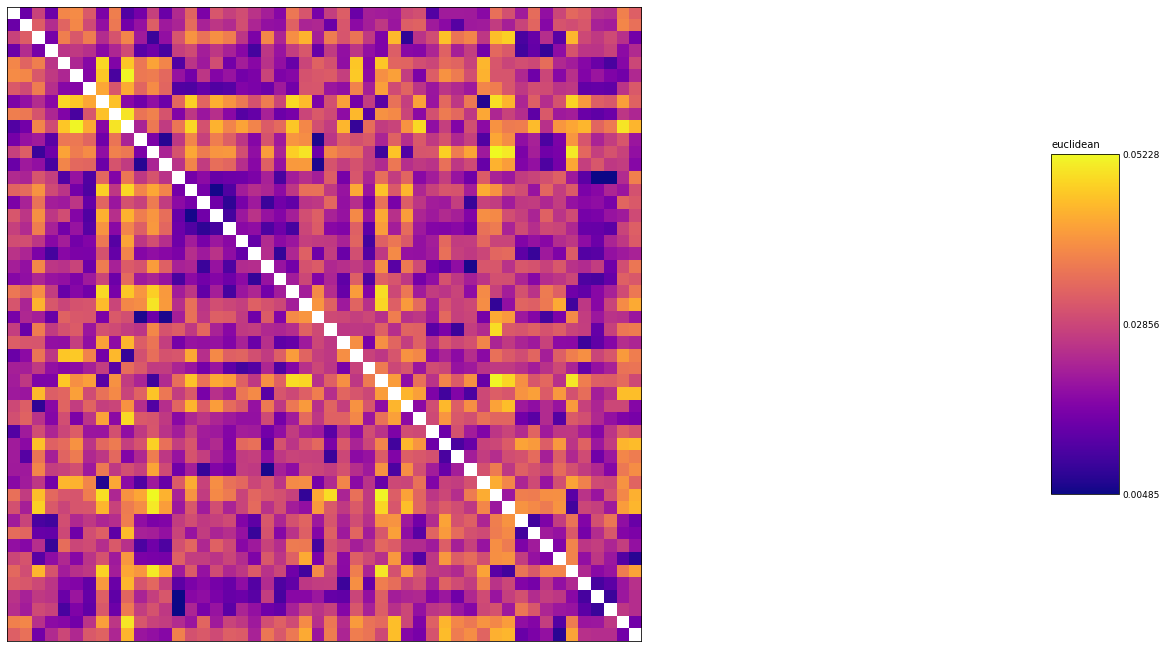

In [25]:
#subject 1 - video
sub1_vid = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-videowithsound-version1_v_v2_rested-dane_2_1D.mat"
rdm_sub1_vid = rsa.io.meadows.load_rdms(sub1_vid,True)
fig,axis,_ = rsa.vis.show_rdm(rdm_sub1_vid, cmap = 'plasma', figsize=(25,25), show_colorbar="figure")

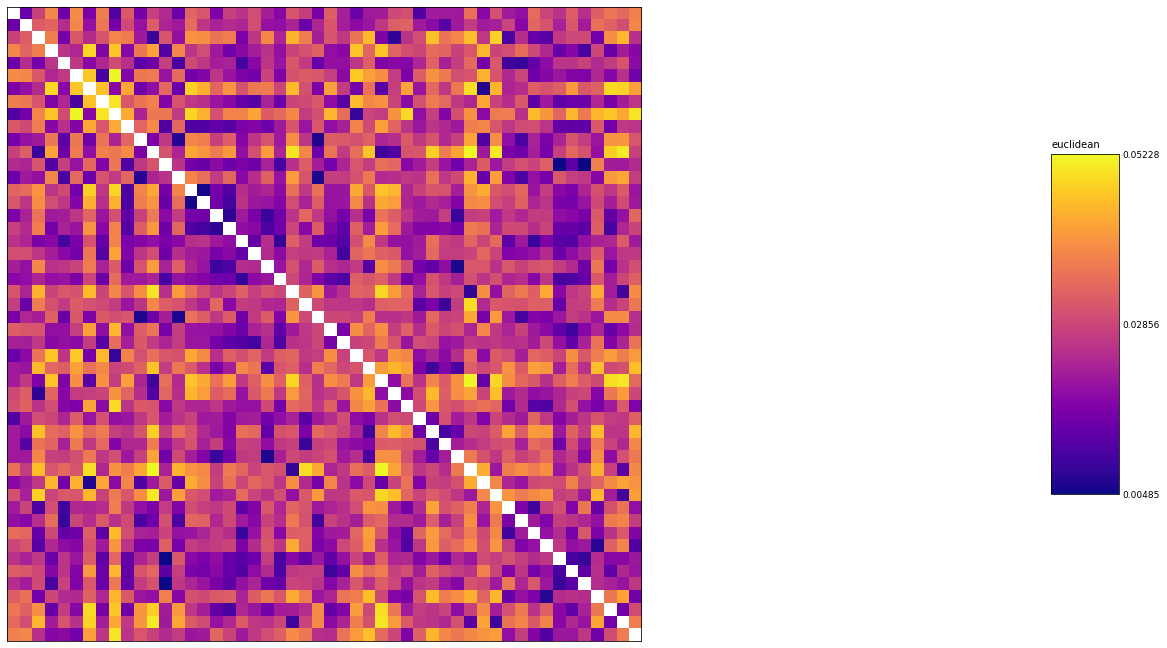

In [26]:
#subject 1 - video
sub1_vid = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-videowithsound-version1_v_v2_rested-dane_2_1D.mat"
rdm_sub1_vid = rsa.io.meadows.load_rdms(sub1_vid,False)
fig,axis,_ = rsa.vis.show_rdm(rdm_sub1_vid, cmap = 'plasma', figsize=(25,25), show_colorbar="figure")

# subject 2

In [ ]:
sub2_audio = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-audio-version1_v_v1_famous-lizard_2_1D.mat"
rdm_sub2_audio = rsa.io.meadows.load_rdms(sub2_audio)

sub2_img = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-image-version1_v_v2_huge-falcon_2_1D.mat"
rdm_sub2_img = rsa.io.meadows.load_rdms(sub2_img)

sub2_vid = 
rdm_sub2_vid = rsa.io.meadows.load_rdms(sub2_vid)

sub2_mutevid = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-videomutesound-version1_v_v2_firm-cow_2_1D.mat"
rdm_sub2_mutevid = rsa.io.meadows.load_rdms(sub2_mutevid)


# we want to compare audio to video 
sub2_vidxaudio = rdm.compare_correlation(rdm_sub2_vid, rdm_sub2_audio)
# compare img to video 
sub2_vidximg = rdm.compare_correlation(rdm_sub2_vid, rdm_sub2_img)
# compare img to mute video
sub2_imgxmute = rdm.compare_correlation(rdm_sub2_img, rdm_sub2_mutevid)
#compare video to mute video
sub2_vidxmute = rdm.compare_correlation(rdm_sub2_vid, rdm_sub2_mutevid)
# compare audio to image/mute video 
sub2_audioximg = rdm.compare_correlation(rdm_sub2_audio, rdm_sub2_img)
sub2_audioxmute = rdm.compare_correlation(rdm_sub2_audio, rdm_sub2_mutevid)
# compare video with mute video 
sub2_vidxmute = rdm.compare_correlation(rdm_sub2_vid, rdm_sub2_mutevid)

# Subject 3 

In [33]:
sub3_audio = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-audio-version1_v_v2_huge-ferret_2_1D.mat"
rdm_sub3_audio = rsa.io.meadows.load_rdms(sub3_audio)

sub3_img = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-image-version1_v_v2_better-hound_2_1D.mat"
rdm_sub3_img = rsa.io.meadows.load_rdms(sub3_img)

sub3_mutevid = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-videomutesound-version1_v_v2_joint-swan_2_1D.mat"
rdm_sub3_mutevid = rsa.io.meadows.load_rdms(sub3_mutevid)

sub3_video = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-videowithsound-version1_v_v2_valued-dingo_2_1D.mat"
rdm_sub3_vid = rsa.io.meadows.load_rdms(sub3_video)

# subject 4

In [35]:
sub4_audio = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-audio-version1_v_v2_novel-donkey_2_1D.mat"
rdm_sub4_audio = rsa.io.meadows.load_rdms(sub4_audio)

sub4_img = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-image-version1_v_v2_guided-koi_2_1D.mat"
rdm_sub4_img = rsa.io.meadows.load_rdms(sub4_img)

sub4_mute = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-videomutesound-version1_v_v2_sweet-rhino_2_1D.mat"
rdm_sub4_mute = rsa.io.meadows.load_rdms(sub4_mute)

sub4_video = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-videowithsound-version1_v_v2_joint-elk_2_1D.mat"
rdm_sub4_vid = rsa.io.meadows.load_rdms(sub4_video)

## pearson correlation

In [36]:
# we want to compare audio to video 
sub4_vidxaudio = rdm.compare_correlation(rdm_sub4_vid, rdm_sub4_audio)
# compare img to video 
sub4_vidximg = rdm.compare_correlation(rdm_sub4_vid, rdm_sub4_img)
# compare img to mute video
sub4_imgxmute = rdm.compare_correlation(rdm_sub4_img, rdm_sub4_mute)
#compare video to mute video
sub4_vidxmute = rdm.compare_correlation(rdm_sub4_vid, rdm_sub4_mute)
# compare audio to image/mute video 
sub4_audioximg = rdm.compare_correlation(rdm_sub4_audio, rdm_sub4_img)
sub4_audioxmute = rdm.compare_correlation(rdm_sub4_audio, rdm_sub4_mute)
# compare video with mute video 
sub4_vidxmute = rdm.compare_correlation(rdm_sub4_vid, rdm_sub4_mute)

# subjects 5, sub-pilot 0 to 3

n/a

### take mean of subjects 1 to 4

In [37]:
# we want to compare audio to video 
vidxaudio = (sub1_vidxaudio[0][0] + sub2_vidxaudio[0][0] + sub3_vidxaudio[0][0] +sub4_vidxaudio[0][0])/4
# compare img to video 
vidximg = (sub1_vidximg[0][0] + sub2_vidximg[0][0] + sub3_vidximg[0][0] +sub4_vidximg[0][0])/4
# compare img to mute video
imgxmute = (sub1_imgxmute[0][0] + sub2_imgxmute[0][0] + sub3_imgxmute[0][0] +sub4_imgxmute[0][0])/4
#compare video to mute video
vidxmute = (sub1_vidxmute[0][0] + sub2_vidxmute[0][0] + sub3_vidxmute[0][0] +sub4_vidxmute[0][0])/4
# compare audio to image/mute video 
audioximg = (sub1_audioximg[0][0] + sub2_audioximg[0][0] + sub3_audioximg[0][0] +sub4_audioximg[0][0])/4
audioxmute = (sub1_audioxmute[0][0] + sub2_audioxmute[0][0] + sub3_audioxmute[0][0] +sub4_audioxmute[0][0])/4
# compare video with mute video 
vidxmute = (sub1_vidxmute[0][0] + sub2_vidxmute[0][0] + sub3_vidxmute[0][0] +sub4_vidxmute[0][0])/4

In [38]:
imgxmute

0.5169640245862694

In [39]:
vidxmute

0.3295333963600885

In [40]:
audioximg

0.374831221662794

In [41]:
audioxmute

0.38121890799069214

In [42]:
# video compared to audio and img/mute 

In [43]:
vidxaudio

0.28981990921552586

In [44]:
vidximg

0.45053091796590894

In [45]:
vidxmute

0.3295333963600885

# EEG data

## eeg json

In [5]:
eeg1json = r"C:\Users\TKS086\Audio-visual_similarity-main\data\sub-01_ses-05_task-nback_run-01_eeg.json"

In [6]:
with open(eeg1json) as fhandle:
        data = json.load(fhandle)

In [7]:
type(data)

dict

In [8]:
data.keys()

dict_keys(['CapManufacturer', 'CapManufacturersModelName', 'ECGChannelCount', 'EEGChannelCount', 'EEGGround', 'EEGPlacementScheme', 'EEGReference', 'EMGChannelCount', 'EOGChannelCount', 'InstitutionAddress', 'InstitutionName', 'Manufacturer', 'ManufacturersModelName', 'MiscChannelCount', 'PowerLineFrequency', 'RecordingDuration', 'RecordingType', 'SamplingFrequency', 'SoftwareFilters', 'TaskName', 'TriggerChannelCount'])

In [9]:
EOGchancount = data['EOGChannelCount']
EOGchancount

1

In [10]:
ECGchancount = data['ECGChannelCount']
ECGchancount

0

In [11]:
TriggerChanCount = data['TriggerChannelCount']
TriggerChanCount

1

In [12]:
EEGReference = data['EEGReference']
EEGReference

'Mastoids; left (EXG1) and right (EXG2)'

In [13]:
EEGPlacem = data['EEGPlacementScheme']
EEGPlacem

'ABCD'

## bdf

In [14]:
eeg1 = r"C:\Users\TKS086\Audio-visual_similarity-main\data\sub-01_ses-05_task-nback_run-01_eeg.bdf"

In [15]:
EOG = ["EXG3"] 

In [16]:
MISC = ["EXG4", "EXG5", "EXG6", "EXG7", "EXG8"]

In [17]:
raw = mne.io.read_raw_bdf(eeg1, eog=EOG, misc=MISC, stim_channel='auto', exclude=(), preload=True, verbose=None)

Extracting EDF parameters from C:\Users\TKS086\Audio-visual_similarity-main\data\sub-01_ses-05_task-nback_run-01_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6297599  =      0.000 ...  6149.999 secs...


In [18]:
raw

<RawEDF | sub-01_ses-05_task-nback_run-01_eeg.bdf, 137 x 6297600 (6150.0 s), ~6.43 GB, data loaded>

In [2]:
sub1 = r"C:\Users\TKS086\Audio-visual_similarity-main\data\sub_01_session_01.bdf"

In [3]:
raw = mne.io.read_raw_bdf(sub1, eog=None, misc=None, stim_channel='auto', exclude=(), preload=True, verbose=None)

Extracting EDF parameters from C:\Users\TKS086\Audio-visual_similarity-main\data\sub_01_session_01.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6297599  =      0.000 ...  6149.999 secs...


In [4]:
raw

<RawEDF | sub_01_session_01.bdf, 137 x 6297600 (6150.0 s), ~6.43 GB, data loaded>

In [5]:
dir(raw);

In [6]:
dir(mne.io);

In [7]:
ref_channels=['EXG1', 'EXG2']

In [8]:
raw.set_eeg_reference(ref_channels=['EXG1', 'EXG2']) #Mastoids; left (EXG1) and right (EXG2) - use average of mastoid channels as reference

EEG channel type selected for re-referencing
Applying a custom EEG reference.


<RawEDF | sub_01_session_01.bdf, 137 x 6297600 (6150.0 s), ~6.43 GB, data loaded>

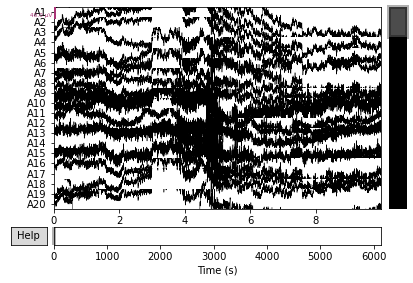

In [9]:
raw.plot(); 

In [7]:
EOG = ["EXG3"] 

In [8]:
MISC = ["EXG4", "EXG5", "EXG6", "EXG7", "EXG8"]

In [16]:
mapping = {'EXG1':'misc', 'EXG2':'misc','EXG3':'eog','EXG4':'misc','EXG5':'misc','EXG6':'misc','EXG7':'misc','EXG8':'misc'}

Creating RawArray with float64 data, n_channels=128, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


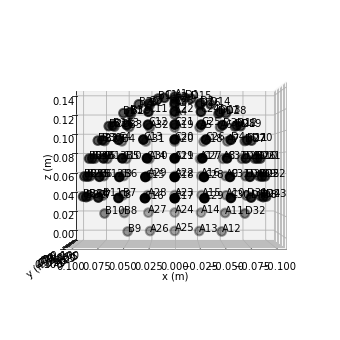

Creating RawArray with float64 data, n_channels=128, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


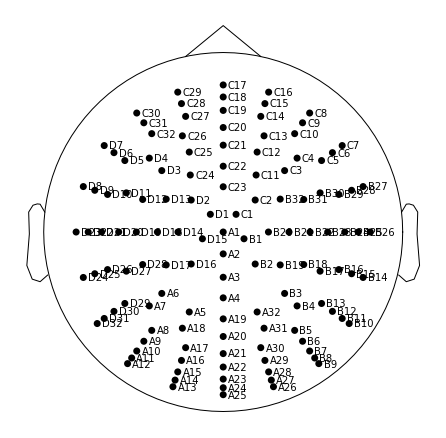

In [17]:
montage = mne.channels.make_standard_montage('biosemi128')
fig = montage.plot(kind='3d');
fig.gca().view_init(azim=70, elev=15);  # set view angle
montage.plot(show_names=True);

In [18]:
raw.set_channel_types(mapping, verbose=None)
raw.set_montage(montage, match_case=True, match_alias=True, on_missing='ignore')

<RawEDF | sub_01_session_01.bdf, 137 x 6297600 (6150.0 s), ~6.43 GB, data loaded>

Effective window size : 2.000 (s)


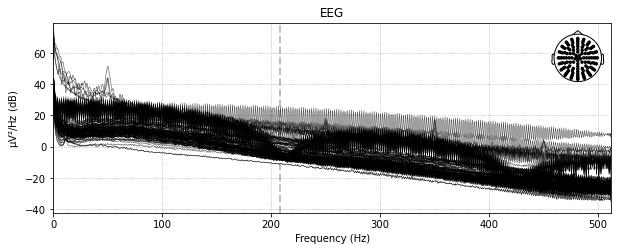

In [15]:
raw.plot_psd();

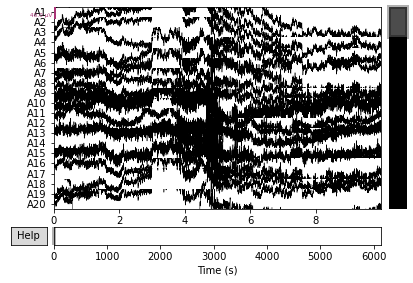

In [16]:
raw.plot();

In [17]:
raw.filter(0.5,12.5);

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 12.50 Hz
- Upper transition bandwidth: 3.12 Hz (-6 dB cutoff frequency: 14.06 Hz)
- Filter length: 6759 samples (6.601 sec)



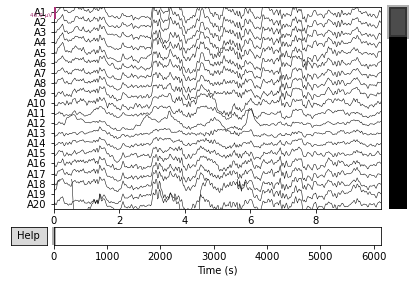

In [18]:
raw.plot();

In [21]:
filt_raw = raw.copy()
filt_raw.load_data().filter(l_freq=1., h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3381 samples (3.302 sec)



<RawEDF | sub_01_session_01.bdf, 137 x 6297600 (6150.0 s), ~6.43 GB, data loaded>

In [ ]:
ica = ICA(n_components=15, max_iter='auto', random_state=97);
ica.fit(filt_raw);

Fitting ICA to data using 130 channels (please be patient, this may take a while)


In [23]:
raw.load_data()
ica.plot_sources(raw, show_scrollbars=False)

AttributeError: 'ICA' object has no attribute 'n_components_'

In [24]:
ica.plot_components()

AttributeError: 'ICA' object has no attribute 'mixing_matrix_'

### eog artefacts - none to remove 

In [19]:
ica = mne.preprocessing.ICA(n_components=15, random_state=0)#eyemovement artefacts are the big waves, we use ica 

C:\Users\TKS086\AppData\Local\Temp/ipykernel_20080/1343988306.py:1: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ICA(n_components=15, random_state=0)#eyemovement artefacts are the big waves, we use ica


In [20]:
ica.fit(raw.copy().filter(0.5,12.5))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 12.50 Hz
- Upper transition bandwidth: 3.12 Hz (-6 dB cutoff frequency: 14.06 Hz)
- Filter length: 6759 samples (6.601 sec)

Fitting ICA to data using 128 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 326.7s.


<ICA | raw data decomposition, fit (fastica): 6297600 samples, 15 components, channels used: "eeg">

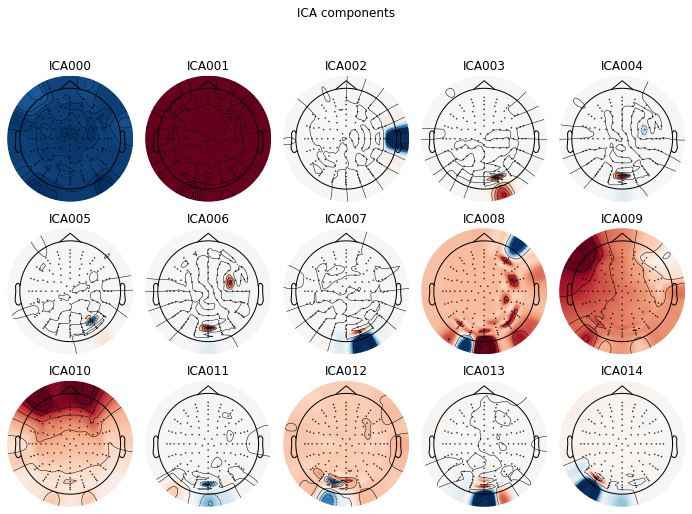

In [21]:
ica.plot_components(outlines="skirt");

In [ ]:
#ica.exclude= [] appears to be none to exclude, will use algorithm to check 

In [22]:
bad_idx, scores = ica.find_bads_eog(raw, 'EXG3', threshold =2)
print(bad_idx) # automatic algorithm - returns none to exclude

Using EOG channel: EXG3
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10240 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz

### events 

In [119]:
events = mne.find_events(raw)

Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1050 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 1

In [120]:
events

array([[  23604,       0,     104],
       [  28127,       0,     102],
       [  32650,       0,     250],
       ...,
       [6277984,       0,     250],
       [6280715,       0,      34],
       [6285135,       0,     131]], dtype=int64)

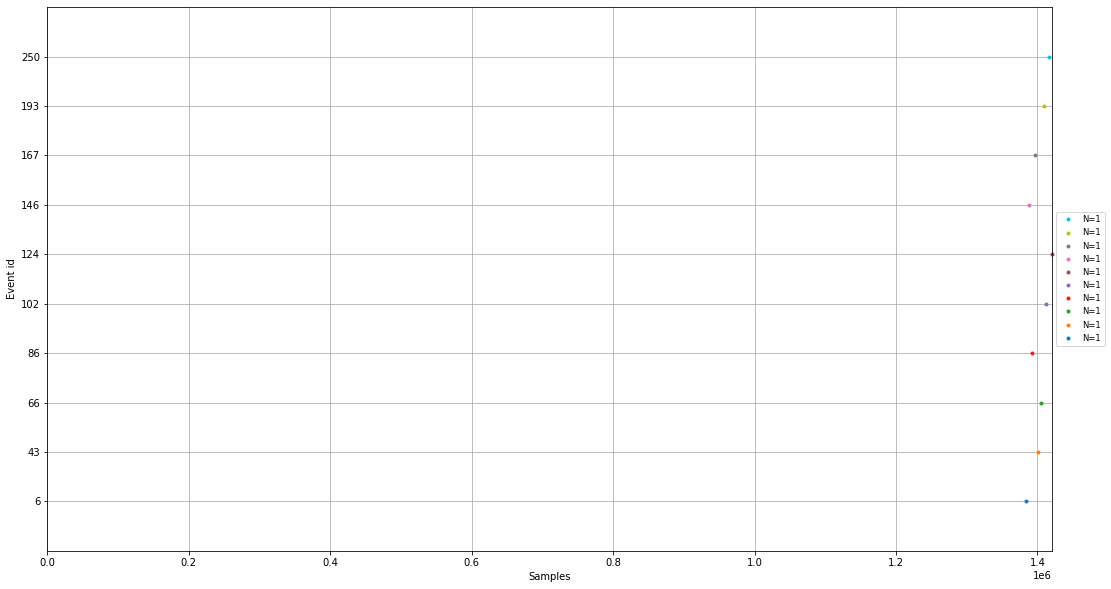

In [121]:
mne.viz.plot_events(events[240:250]);

C:\Users\TKS086\AppData\Local\Temp/ipykernel_10920/1423360370.py:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events[1:250]);


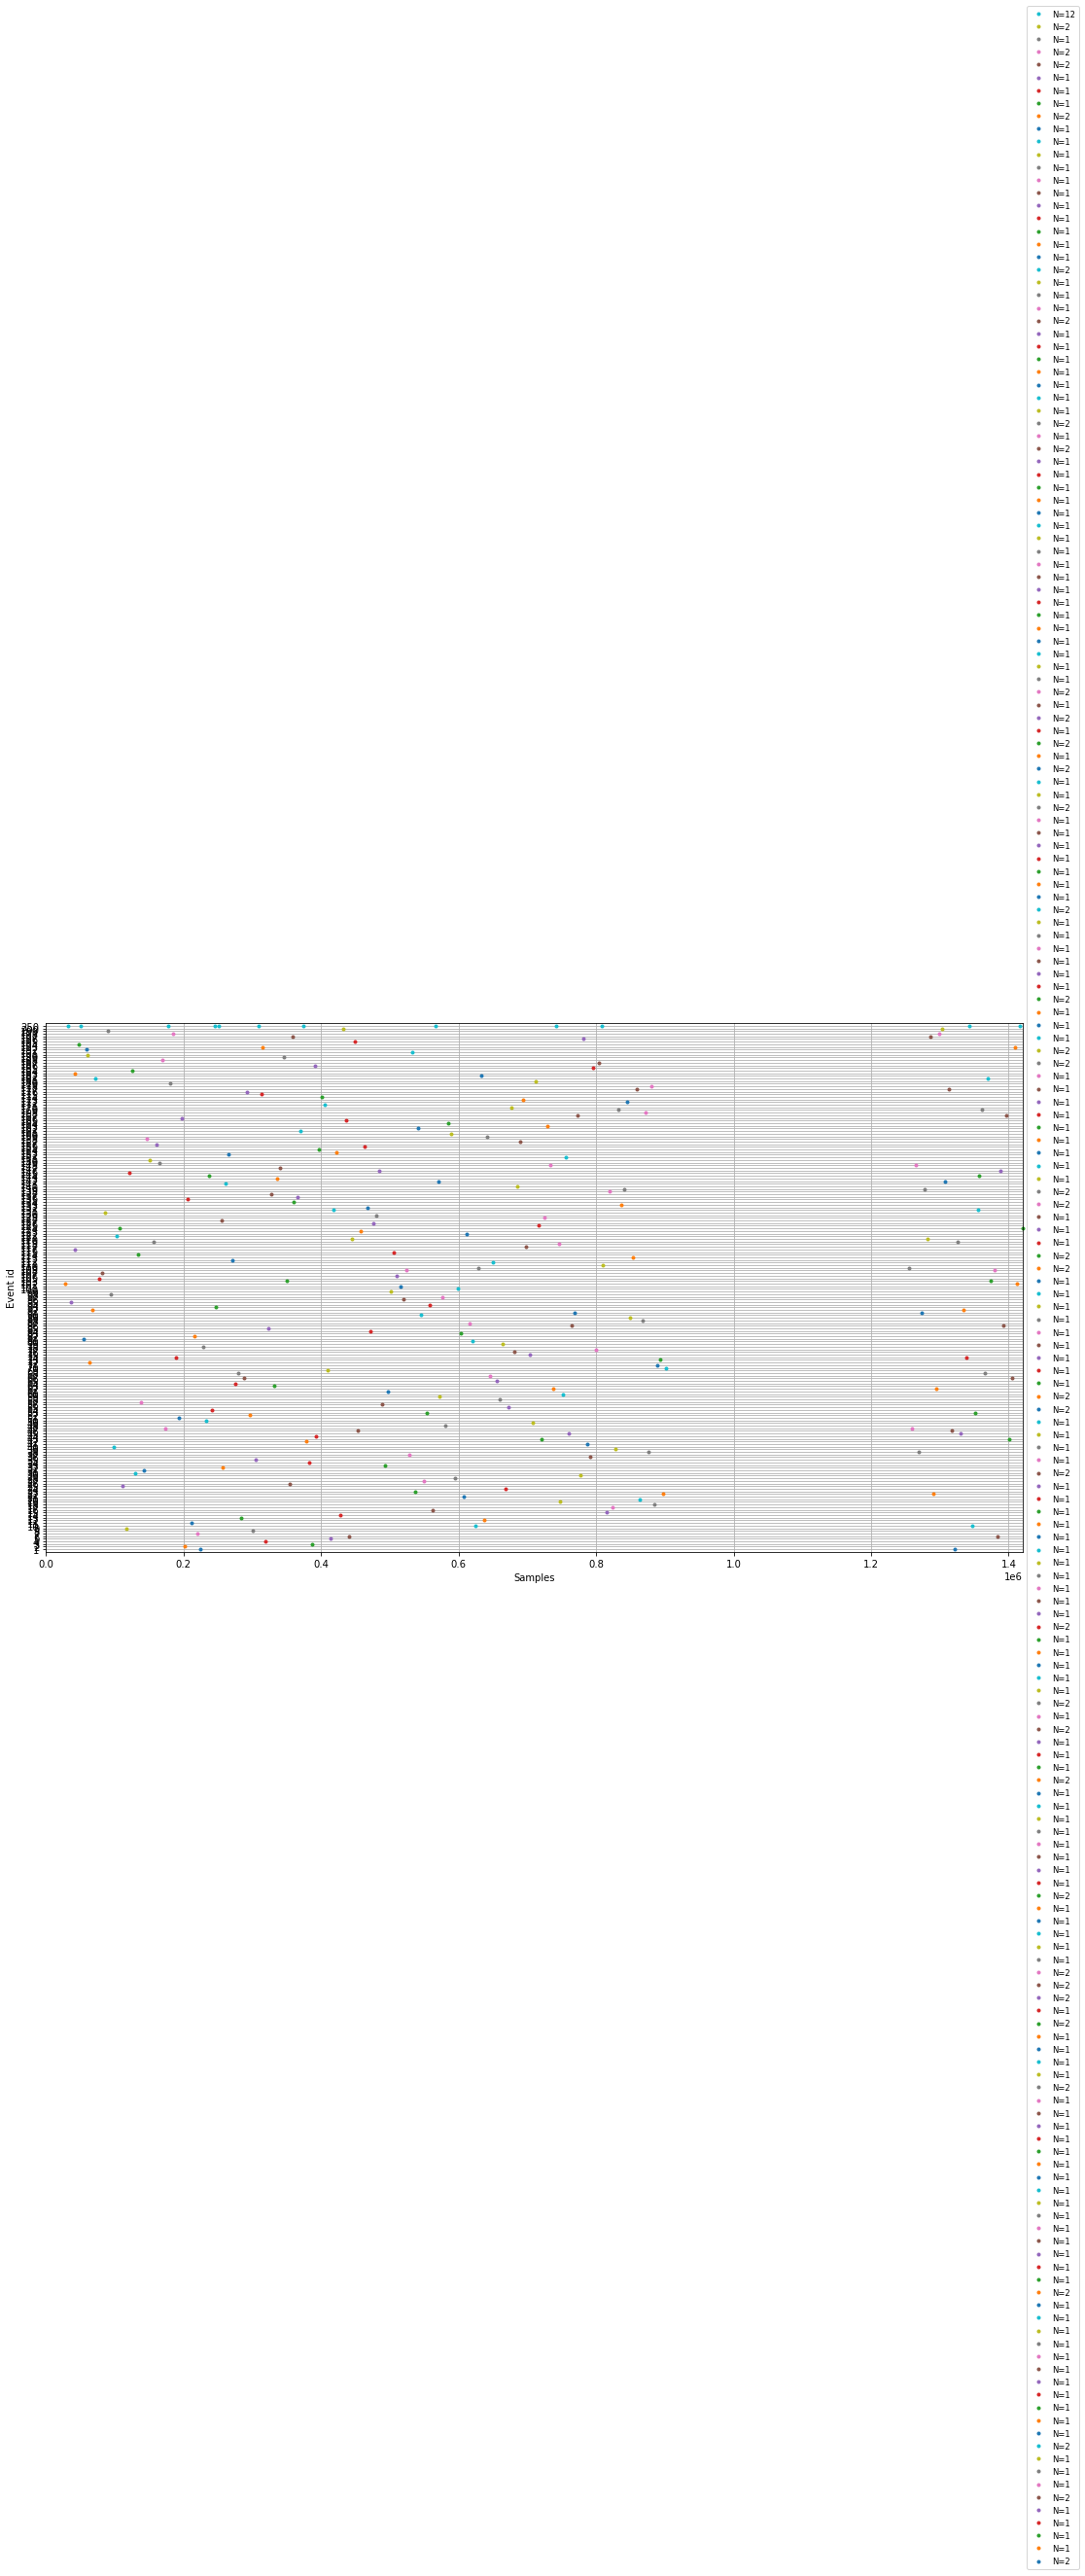

In [122]:
mne.viz.plot_events(events[1:250]);

In [123]:
event_ids = {"standard/stimulus": 2, "target/stimulus": 1}

In [124]:
epochs = mne.Epochs(raw, events, event_id=event_ids)

Not setting metadata
Not setting metadata
10 matching events found
Setting baseline interval to [-0.2001953125, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


Loading data for 10 events and 718 original time points ...
0 bad epochs dropped
Loading data for 10 events and 718 original time points ...
Loading data for 10 events and 718 original time points ...


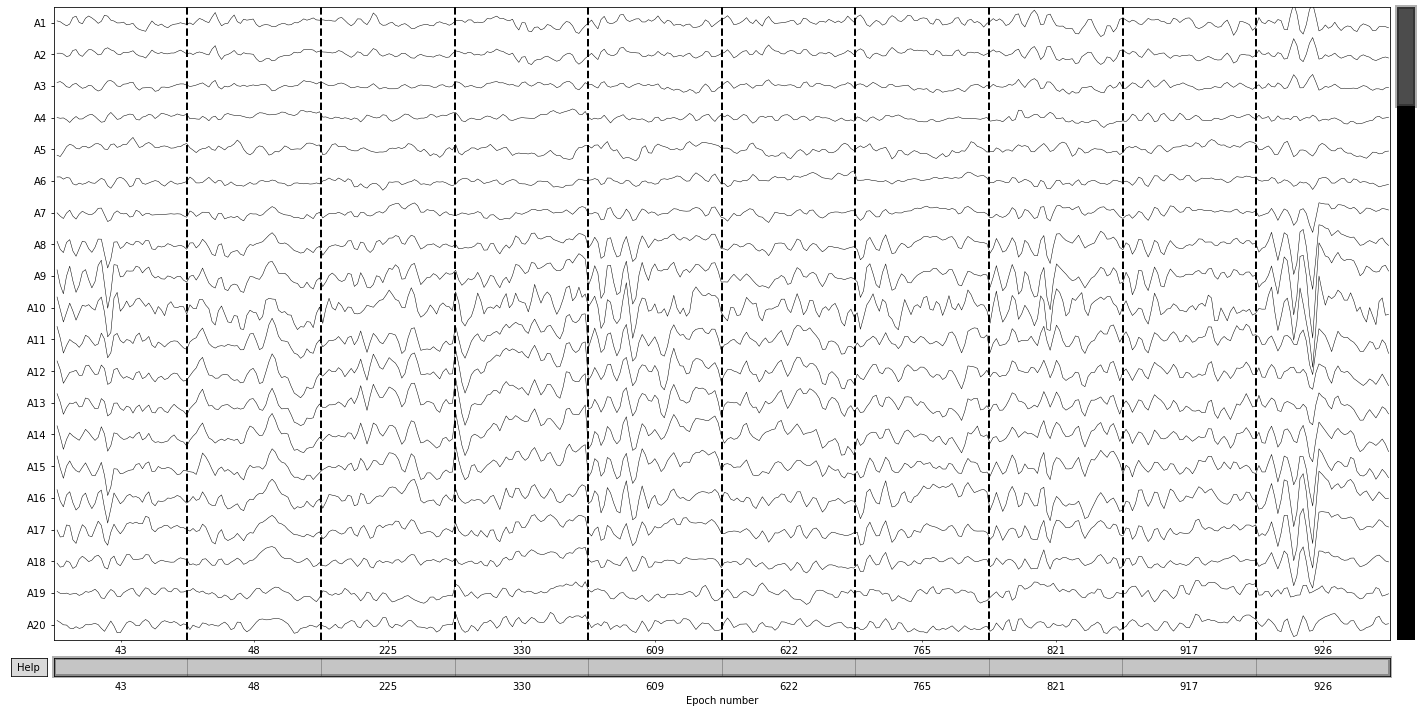

In [125]:
epochs.plot();

In [126]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

C:\Users\TKS086\AppData\Local\Temp/ipykernel_10920/466687193.py:1: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ICA(n_components=20, random_state=0)


In [127]:
epochs =mne.Epochs(raw, events, event_id=event_ids, preload=True)

Not setting metadata
Not setting metadata
10 matching events found
Setting baseline interval to [-0.2001953125, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 10 events and 718 original time points ...
0 bad epochs dropped


In [128]:
epochs.apply_baseline((None,0))

Applying baseline correction (mode: mean)


Number of events,10
Events,standard/stimulus: 5target/stimulus: 5
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [129]:
target = epochs["target"]

In [130]:
stimulus = epochs["stimulus"]

In [131]:
del raw, epochs  # free up memory

Not setting metadata
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\TKS086\AppData\Local\Temp/ipykernel_10920/1019008715.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  target.plot_image(picks=['A1', 'A2'])
C:\Users\TKS086\AppData\Local\Temp/ipykernel_10920/1019008715.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  target.plot_image(picks=['A1', 'A2'])


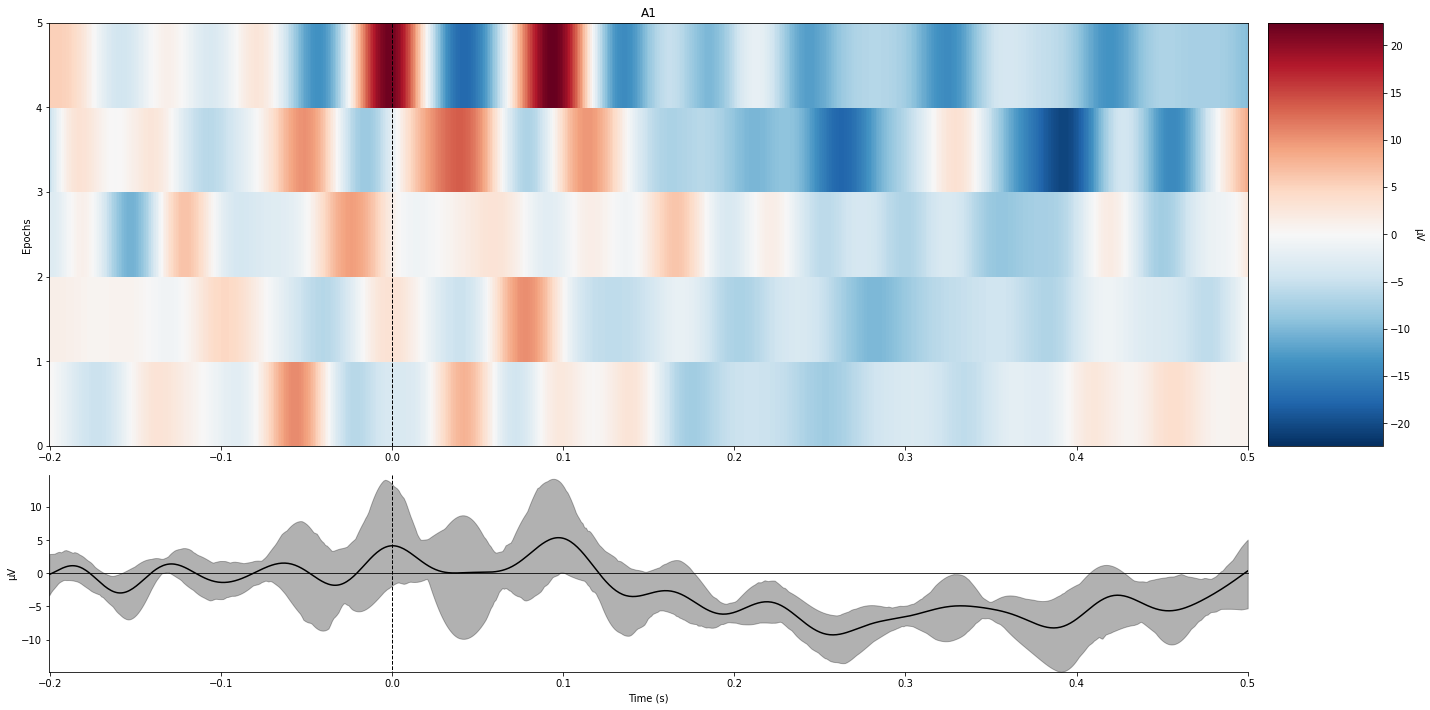

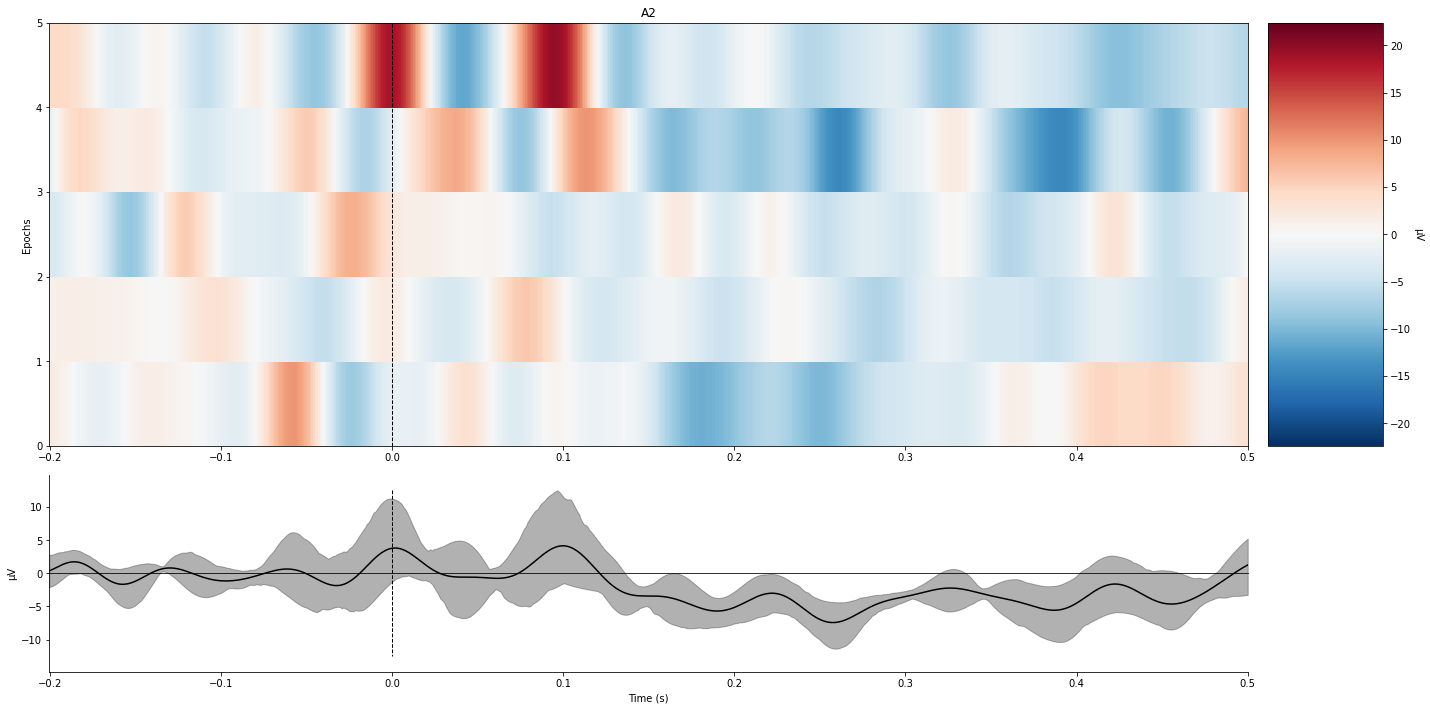

[<Figure size 1440x720 with 3 Axes>, <Figure size 1440x720 with 3 Axes>]

In [138]:
target.plot_image(picks=['A1', 'A2'])

No baseline correction applied


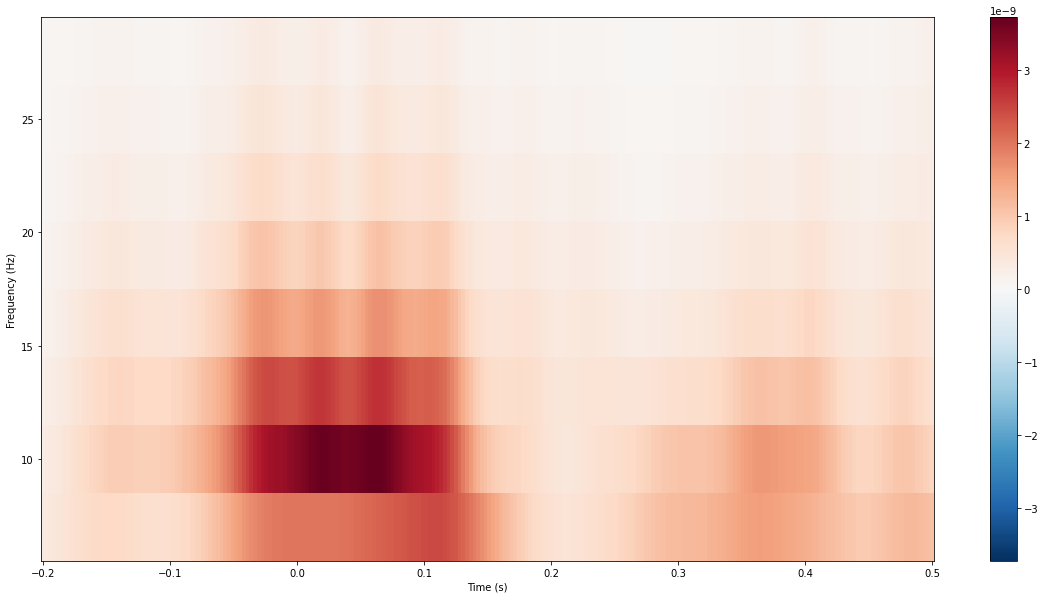

[<Figure size 1440x720 with 2 Axes>]

In [139]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(stimulus, n_cycles=2, return_itc=False,
                                      freqs=frequencies, decim=3)
power.plot(['A1'])

No baseline correction applied


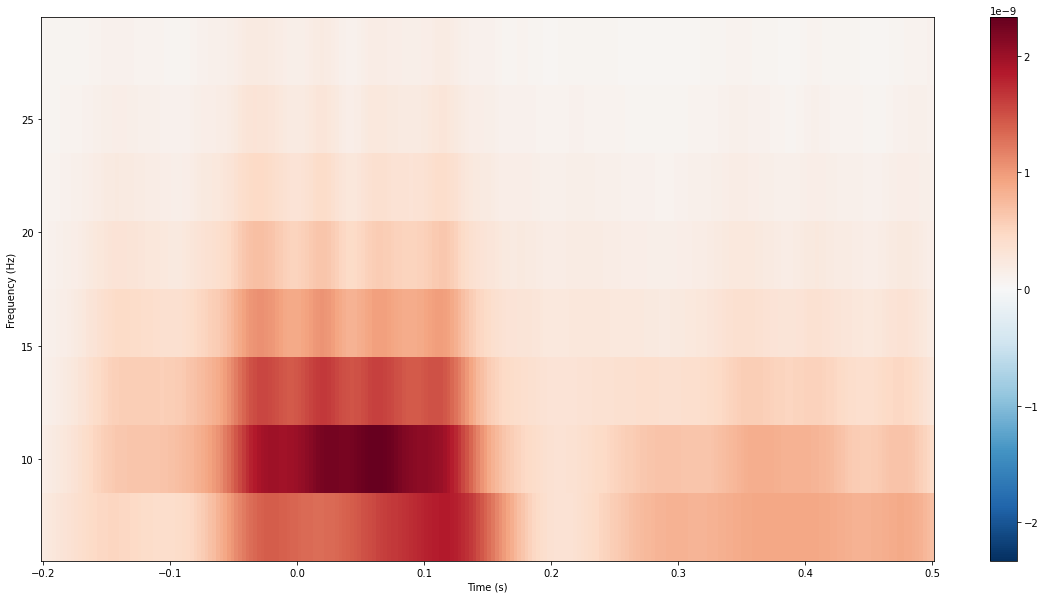

[<Figure size 1440x720 with 2 Axes>]

In [140]:
power.plot(['A2'])

No baseline correction applied


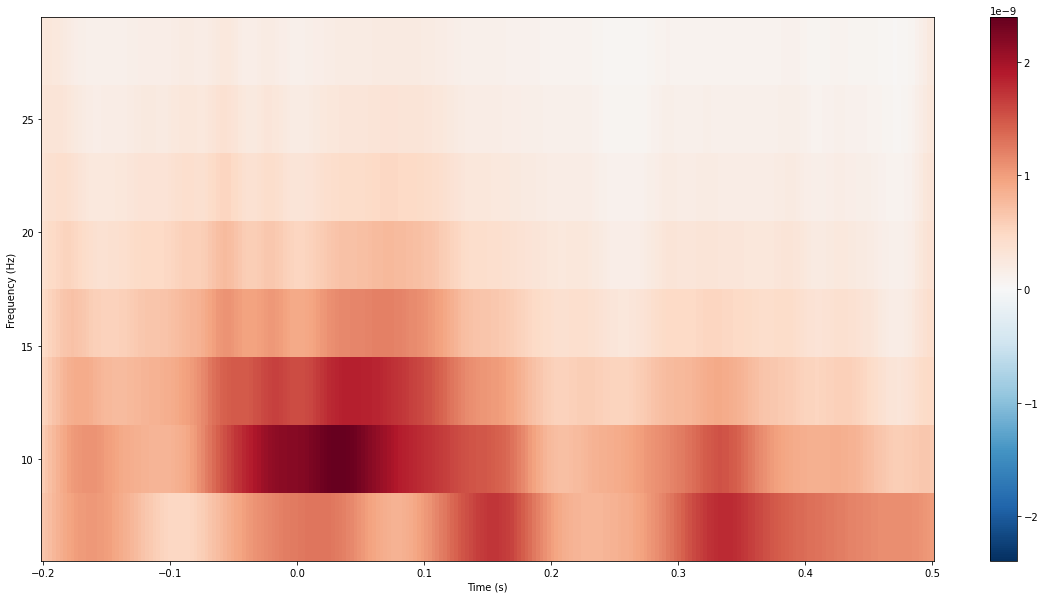

[<Figure size 1440x720 with 2 Axes>]

In [141]:
power.plot(['A20'])

combining channels using "gfp"
combining channels using "gfp"


C:\Users\TKS086\AppData\Local\Temp/ipykernel_10920/1403687912.py:4: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(dict(stim=stimulus_evoked, tar=target_evoked),


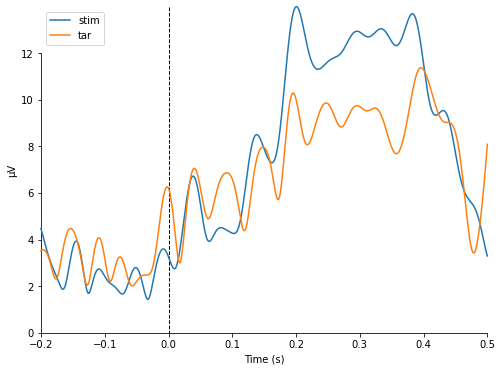

[<Figure size 576x432 with 1 Axes>]

In [142]:
stimulus_evoked = stimulus.average()
target_evoked = target.average()

mne.viz.plot_compare_evokeds(dict(stim=stimulus_evoked, tar=target_evoked),
                             legend='upper left', show_sensors='upper right')

No projector specified for this dataset. Please consider the method self.add_proj.


C:\Users\TKS086\AppData\Local\Temp/ipykernel_10920/1798902476.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  stimulus_evoked.plot_joint(picks='eeg')


RuntimeError: No digitization points found.

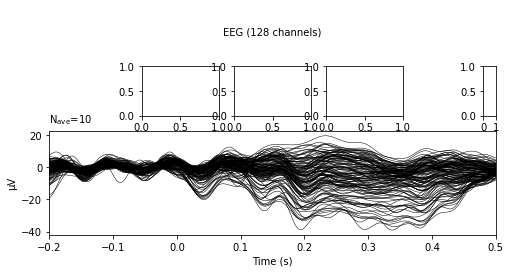

In [143]:
stimulus_evoked.plot_joint(picks='eeg')

In [ ]:
stimulus_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg')

# Stimuli 

In [68]:
stimuli = securekit["stimuli"]
stim = pd.Series(stimuli)
print(stim)

0     baby_laughing                   
1     baby_singing                    
2     beach                           
3     bird_singing                    
4     boxing                          
5     boiling_water_with_kettle       
6     bubble_wrap_popping             
7     cat_meowing                     
8     chainsaw_cutting                
9     child_crying                    
10    cow_moo                         
11    donkey_braying                  
12    dolphin_call                    
13    drinking_sounds                 
14    dot_matrix_printer              
15    eating_sounds                   
16    drum_roll                       
17    fireplace                       
18    finger_snapping                 
19    glass_breaking                  
20    guitar_plucking                 
21    heartbeat                       
22    hammer_a_nail                   
23    helicopter_landing              
24    horse_neighing                  
25    interview          

# 2021 data 

## version 1 

In [2]:
v1data21 = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\2021\Meadows_Audio-Visual_Sim_v_v1_3D.mat"

In [3]:
v1tree = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\2021\Meadows_Audio-Visual_Sim_v_v1_tree.json"

In [4]:
v1treedf = pd.read_json(v1tree)

In [5]:
rdmdata1 = scipy.io.loadmat(v1data21)
rdmdata1["participation_ids"] 

array(['causal-falcon'], dtype='<U13')

In [6]:
with open(v1tree) as fhandle:
        data = json.load(fhandle)

In [7]:
type(data)

dict

In [8]:
data.keys()

dict_keys(['causal-falcon'])

In [9]:
data1 = data['causal-falcon']

In [10]:
data1.keys()

dict_keys(['token', 'tasks'])

In [11]:
data11 = data1['tasks']

In [12]:
audio = data11[3]

In [13]:
type(audio)

dict

In [14]:
audio.keys()
%matplotlib widget

dict_keys(['status', 'task', 'stimuli', 'trials', 'rdm', 'next_trial_stimuli', 'qualification'])

In [60]:
rdm = audio['rdm']
euc_dist = squareform(rdm)

#stimuli 
stim = audio['stimuli']
y_names = []
for i in stim:
    y_names.append(i['name'])
x_names = []
for i in stim:
    x_names.append(i['name'])
fig, ax = plt.subplots()

ax.set_xticks(np.arange(len(x_names)))
ax.set_yticks(np.arange(len(y_names)))
ax.set_xticklabels(x_names, fontsize = 5)
ax.set_yticklabels(y_names, fontsize = 5)  
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
plt.imshow(euc_dist, cmap = 'plasma')
fig.suptitle('Audio RDM for participant causal-falcon')
plt.xlabel('Auditory stimulus')
plt.ylabel('Auditory stimulus')
plt.colorbar(mappable=None, cax=None, ax=None)
fig.subplots_adjust(bottom=0.23)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [61]:
img = data11[4]

rdm = img['rdm']
euc_dist = squareform(rdm)

#stimuli 
stim = audio['stimuli']
y_names = []
for i in stim:
    y_names.append(i['name'])
x_names = []
for i in stim:
    x_names.append(i['name'])
fig, ax = plt.subplots()

ax.set_xticks(np.arange(len(x_names)))
ax.set_yticks(np.arange(len(y_names)))
ax.set_xticklabels(x_names, fontsize = 5)
ax.set_yticklabels(y_names, fontsize = 5)  
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
plt.imshow(euc_dist, cmap = 'plasma')
fig.suptitle('Static image RDM for participant causal-falcon')
plt.xlabel('Static image stimulus')
plt.ylabel('Static image stimulus')
plt.colorbar(mappable=None, cax=None, ax=None)
fig.subplots_adjust(bottom=0.23)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [62]:
mutevid = data11[5]
rdm = mutevid['rdm']
euc_dist = squareform(rdm)

#stimuli 
stim = audio['stimuli']
y_names = []
for i in stim:
    y_names.append(i['name'])
x_names = []
for i in stim:
    x_names.append(i['name'])
fig, ax = plt.subplots()

ax.set_xticks(np.arange(len(x_names)))
ax.set_yticks(np.arange(len(y_names)))
ax.set_xticklabels(x_names, fontsize = 5)
ax.set_yticklabels(y_names, fontsize = 5)  
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")

plt.imshow(euc_dist,cmap = 'plasma')
fig.suptitle('Mute video RDM for participant causal-falcon')
plt.xlabel('Mute video stimulus')
plt.ylabel('Mute video stimulus')
plt.colorbar(mappable=None, cax=None, ax=None)
fig.subplots_adjust(bottom=0.23)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [63]:
vid = data11[6]

rdm = vid['rdm']
euc_dist = squareform(rdm)

#stimuli 
stim = audio['stimuli']
y_names = []
for i in stim:
    y_names.append(i['name'])
x_names = []
for i in stim:
    x_names.append(i['name'])
fig, ax = plt.subplots()

ax.set_xticks(np.arange(len(x_names)))
ax.set_yticks(np.arange(len(y_names)))
ax.set_xticklabels(x_names, fontsize = 5)
ax.set_yticklabels(y_names, fontsize = 5)  
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")

plt.imshow(euc_dist, cmap = 'plasma')
fig.suptitle('Video RDM for participant causal-falcon')
plt.xlabel('Video stimulus')
plt.ylabel('Video stimulus')
plt.colorbar(mappable=None, cax=None, ax=None)
fig.subplots_adjust(bottom=0.23)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## version 2 

In [68]:
v2tree = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\2021\Meadows_Audio-Visual_Sim_v_v2_tree.json"
v2treedf = pd.read_json(v2tree)
status2 = v2treedf.iloc[1,:] #all are finished 
len(status2) #31 finished participants

In [92]:
with open(v2tree) as fhandle:
        data = json.load(fhandle)
data.keys()

dict_keys(['known-spider', 'just-kodiak', 'square-wren', 'robust-bobcat', 'rare-lab', 'select-worm', 'key-ape', 'actual-mutt', 'united-viper', 'first-man', 'clean-stork', 'hot-boa', 'nearby-hen', 'next-oriole', 'frank-iguana', 'right-cow', 'sought-teal', 'expert-yak', 'humane-caiman', 'famous-mammal', 'fluent-grouse', 'saved-falcon', 'large-pup', 'game-wasp', 'full-bee', 'still-lark', 'square-baboon', 'mint-rhino', 'fleet-osprey', 'ample-bream', 'pro-possum'])

#### known-spider

In [99]:
data1 = data['known-spider']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]

#stimuli 
stim = audio['stimuli']
y_names = []
for i in stim:
    y_names.append(i['name'])
x_names = []
for i in stim:
    x_names.append(i['name'])

In [94]:
rdm = audio['rdm']
euc_dist = squareform(rdm)
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(x_names)))
ax.set_yticks(np.arange(len(y_names)))
ax.set_xticklabels(x_names, fontsize = 5)
ax.set_yticklabels(y_names, fontsize = 5)  
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
plt.imshow(euc_dist, cmap = 'plasma')
fig.suptitle('Audio RDM for participant known-spider')
plt.xlabel('Auditory stimulus')
plt.ylabel('Auditory stimulus')
plt.colorbar(mappable=None, cax=None, ax=None)
fig.subplots_adjust(bottom=0.23)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [95]:
rdm = img['rdm']
euc_dist = squareform(rdm)
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(x_names)))
ax.set_yticks(np.arange(len(y_names)))
ax.set_xticklabels(x_names, fontsize = 5)
ax.set_yticklabels(y_names, fontsize = 5)  
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
plt.imshow(euc_dist, cmap = 'plasma')
fig.suptitle('Static image RDM for participant known-spider')
plt.xlabel('Static image stimulus')
plt.ylabel('Static image stimulus')
plt.colorbar(mappable=None, cax=None, ax=None)
fig.subplots_adjust(bottom=0.23)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [96]:
rdm = mutevid['rdm']
euc_dist = squareform(rdm)
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(x_names)))
ax.set_yticks(np.arange(len(y_names)))
ax.set_xticklabels(x_names, fontsize = 5)
ax.set_yticklabels(y_names, fontsize = 5)  
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
plt.imshow(euc_dist, cmap = 'plasma')
fig.suptitle('Mute video RDM for participant known-spider')
plt.xlabel('Mute video stimulus')
plt.ylabel('Mute video stimulus')
plt.colorbar(mappable=None, cax=None, ax=None)
fig.subplots_adjust(bottom=0.23)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [97]:
rdm = vid['rdm']
euc_dist = squareform(rdm)
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(x_names)))
ax.set_yticks(np.arange(len(y_names)))
ax.set_xticklabels(x_names, fontsize = 5)
ax.set_yticklabels(y_names, fontsize = 5)  
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
plt.imshow(euc_dist, cmap = 'plasma')
fig.suptitle('Video RDM for participant known-spider')
plt.xlabel('Video stimulus')
plt.ylabel('Video stimulus')
plt.colorbar(mappable=None, cax=None, ax=None)
fig.subplots_adjust(bottom=0.23)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

#### just-kodiak

In [100]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist_audio = squareform(rdm)
rdm = img['rdm']
euc_dist_img = squareform(rdm)
rdm = mutevid['rdm']
euc_dist_mutevid = squareform(rdm)
rdm = vid['rdm']
euc_dist_vid = squareform(rdm)

#### square-wren

In [ ]:
data1 = data['square-wren']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist_audio = squareform(rdm)
rdm = img['rdm']
euc_dist_img = squareform(rdm)
rdm = mutevid['rdm']
euc_dist_mutevid = squareform(rdm)
rdm = vid['rdm']
euc_dist_vid = squareform(rdm)

#### robust-bobcat

In [ ]:
data1 = data['robust-bobcat']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist_audio = squareform(rdm)
rdm = img['rdm']
euc_dist_img = squareform(rdm)
rdm = mutevid['rdm']
euc_dist_mutevid = squareform(rdm)
rdm = vid['rdm']
euc_dist_vid = squareform(rdm)

#### rare-lab

In [ ]:
data1 = data['rare-lab']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist_audio = squareform(rdm)
rdm = img['rdm']
euc_dist_img = squareform(rdm)
rdm = mutevid['rdm']
euc_dist_mutevid = squareform(rdm)
rdm = vid['rdm']
euc_dist_vid = squareform(rdm)

#### select-worm

In [ ]:
data1 = data['select-worm']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist_audio = squareform(rdm)
rdm = img['rdm']
euc_dist_img = squareform(rdm)
rdm = mutevid['rdm']
euc_dist_mutevid = squareform(rdm)
rdm = vid['rdm']
euc_dist_vid = squareform(rdm)

#### key-ape

In [ ]:
data1 = data['key-ape']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist_audio = squareform(rdm)
rdm = img['rdm']
euc_dist_img = squareform(rdm)
rdm = mutevid['rdm']
euc_dist_mutevid = squareform(rdm)
rdm = vid['rdm']
euc_dist_vid = squareform(rdm)

#### actual-mutt

In [ ]:
data1 = data['actual-mutt']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist_audio = squareform(rdm)
rdm = img['rdm']
euc_dist_img = squareform(rdm)
rdm = mutevid['rdm']
euc_dist_mutevid = squareform(rdm)
rdm = vid['rdm']
euc_dist_vid = squareform(rdm)

#### united-viper

In [ ]:
data1 = data['united-viper']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist_audio = squareform(rdm)
rdm = img['rdm']
euc_dist_img = squareform(rdm)
rdm = mutevid['rdm']
euc_dist_mutevid = squareform(rdm)
rdm = vid['rdm']
euc_dist_vid = squareform(rdm)

#### first-man

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist_audio = squareform(rdm)
rdm = img['rdm']
euc_dist_img = squareform(rdm)
rdm = mutevid['rdm']
euc_dist_mutevid = squareform(rdm)
rdm = vid['rdm']
euc_dist_vid = squareform(rdm)

#### clean-stork

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist_audio = squareform(rdm)
rdm = img['rdm']
euc_dist_img = squareform(rdm)
rdm = mutevid['rdm']
euc_dist_mutevid = squareform(rdm)
rdm = vid['rdm']
euc_dist_vid = squareform(rdm)

#### hot-boa

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### nearby-hen

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### next-oriole

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### frank-iguana

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### right-cow

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### sought-teal

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### expert-yak

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### humane-caiman

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### famous-mammal

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### fluent-grouse

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### saved-falcon

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### large-pup

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### game-wasp

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### full-bee

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### still-lark

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### square-baboon

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### mint-rhino

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### fleet-osprey

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### ample-bream

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)

#### pro-possum

In [ ]:
data1 = data['just-kodiak']
data1 = data1['tasks']
audio = data1[3]
img =  data1[4]
mutevid = data1[5]
vid = data1[6]
rdm = audio['rdm']
euc_dist = squareform(rdm)